# Assignment 5: Exploring Hashing


In this exercise, we will begin to explore the concept of hashing and how it related to various object containers with respect to computational complexity.  We will begin with the base code for as described in Chapter 5 of Grokking Algorithms (Bhargava 2016).  


## Deliverables:

We will again generate random data for this assignment.  

    1) Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates names) and store those names in an unsorted list.

    2) Now store the above names in a set
    3) Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.


    
    4) Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.
    5) Search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.
    6) Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance. 
    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports, Function construction and Array generation

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import time

import random
import string


RANDOM_SEED = 8 #sets random seed

In [2]:


def random_string(str_length, num_strings):
    str_list = [] #instantiates an empty list to hold the strings
    for i in range(0,num_strings): #loop to generate the specified number of strings
        str_list.append(''.join(random.choice(string.ascii_lowercase) for m in range(str_length))) #generates a string of the defined character length 
    return str_list #returns the string list




def MergeSort(arr):
    if len(arr) > 1:
          
        mid = len(arr)//2 # gets middle
        Left = arr[:mid] #splits elements left of middle
        Right = arr[mid:] #splits elements right of middle

        MergeSort(Left) #recursive call on left 
        MergeSort(Right) #recursive call on right
 #set all indicies to 0 
        i=0
        k=0
        j=0
 #below checks the values for if elements are sorted, if unsorted: swap. Merge to the original list    
        while i < len(Left) and j < len(Right):
            if Left[i] < Right[j]:
                arr[k] = Left[i] #makes k index of arr left[i] if it's less than Right[j]
                i += 1 #increments i (the left index)
               
            else:
                arr[k] = Right[j] #if right value is lss than left, makes arr[k] the value of right and increments the right index
                j += 1 #increments j
            k += 1 #increments the arr index
   
        while i < len(Left): #checks to see if reamaining elements in left (less than mid), if so adds to arr at k index and increments i and k
            arr[k] = Left[i]
            i += 1 #increments i
            k += 1 #increments k
 
        while j < len(Right): #checks to see if remaining elements in right (greater than mid), if so adds to arr at k index and increments j and k.
            arr[k] = Right[j]
            j += 1 #increments j
            k += 1 #increments k
        
        return arr



def Container(arr, fun):
    objects = [] #instantiates an empty list to collect the returns
    times = [] #instantiates an empty list to collect times for each computation

    start= time.perf_counter() #collects the start time
    obj = fun(arr) # applies the function to the arr object
    end = time.perf_counter() # collects end time
    duration = (end-start)* 1E3 #converts to milliseconds
    objects.append(obj)# adds the returns of the functions to the objects list
    times.append(duration) # adds the duration for computation to list
    return objects, duration


#function SimpleSearch uses a value counter "low" which increments after a non successful evalution of equivalence for the item within a given array. It returns the milliseconds elapsed and a register of all the incremental guesses.
def SimpleSearch(array, item):
    i = 0 
    guess = array[i]
    start = time.perf_counter() # gets fractional seconds
    while item != guess:
            i += 1
            guess = array[i] #increments low 
    end = time.perf_counter() # gets fractional seconds
    duration = end - start # calcualates difference in fractional seconds
    MilliElapsed = duration*1E3
 # returns a tuple which contains search time in milliseconds and register of the guesses
    return MilliElapsed


#function BinarySearch determines the range of the array and guwsses the midpoint of the range. A loop continues to to perform iterative range evaluations so long as the low value is equal or less than the high value of the array. When the gues converges to the item of interest, a tuple is returned with the time elapsed in milliseconds and the register of guesses.
# binary search for the sorted list

def BinarySearch(array, item):
    i = 0
    length = len(array)-1
    low = array[i] #finds lowest value in array
    high = array[length] #finds highest value in array
    register = [] # creates  empty register of increments; for debug purposes
    start = time.perf_counter() # gets fractional seconds
    while i <= length:     
        mid= (i + length)/2  # calculates midpoint of the range
        guess = int(mid)
        
        register.append(array[guess]) # appends increments to register; for debug purposes
        if array[guess] == item:
                end = time.perf_counter() #datetime.utcnow()
                duration = end - start
                MilliElapsed = duration*1E3
                #print('the string is found for:', n)  
#returns a tuple which contains search time in milliseconds and register of the guesses 
                return MilliElapsed #, register
        elif array[guess] > item: ##### loop for if guess is higher than the item
                high = array[guess] #resets high to the item at the guess index
                low = array[i] #resets low to the item at the i index (typically index 0)
                length = guess#resets length to guess
                #print('The guess went too high!', n, i, array[guess])
        elif array[guess] < item: ######loop for if guess is lower the the item
                low = array[guess] #reset low to the index of guess
                length = len(array)-1 #get the length of the array to pass to high
                high = array[length] #reset high to be the end of the list
                i = guess+1 #make sure we increment i so that it can become the end of the list, otherwise you are going to have a bad time!
                #print('The guess went too low!',n, i, high, length, low)

                


In [3]:
 
str100000 = random_string(str_length=10, num_strings=100000) #generates random strings
str100000_copy = str100000[:] #creates a copy of the random strings

start = time.perf_counter()
MergeSort(str100000)
end = time.perf_counter()
duration = end - start
MS_time = duration*1E3



positions = [9999, 29999, 49999, 69999, 89999, 99999] #positions of the names (needles)

needles = [str100000_copy[i] for i in positions] #collects the needles from the haystack



str100000_container =Container(str100000, MergeSort) #uses mergesort to sort the strings.
temp =str100000_container[0]
str100000_sorted =temp[0]


set_str100000 = set(str100000_copy)

In [4]:
print('the needles are:' , needles)
print('the length of the set is:' ,len(set_str100000))
print('the length of the unsorted copy is:' , len(str100000_copy))
print('the length of the sorted list (mergesort) is:', len(str100000_sorted))

the needles are: ['tlvebrnsco', 'hgwdpwzhkw', 'azolrashsc', 'ffjygvbjmw', 'lglwxvcgfh', 'fvlyuooogx']
the length of the set is: 100000
the length of the unsorted copy is: 100000
the length of the sorted list (mergesort) is: 100000


# B. Sorting


Search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.


### B1. Linear Search of the unsorted list

In [5]:
#linear search for the unsorted list
Linear_times = []
for n in needles:
    temp_time = SimpleSearch(str100000_copy, n)
    Linear_times.append(temp_time)
print('The time reqired for each element in the unsorted array using linear search is:', Linear_times)

The time reqired for each element in the unsorted array using linear search is: [1.631900000575115, 5.594300000666408, 6.411299999854236, 7.821900000635651, 10.593300000437011, 11.358300000210875]


### B2. Binary Search of the sorted list

In [6]:
Binary_times = []
for n in needles:
    temp_time = BinarySearch(str100000, n)
    Binary_times.append(temp_time)
print('The time reqired for each element in the unsorted array using Binary search is:', Binary_times)

The time reqired for each element in the unsorted array using Binary search is: [0.07519999962823931, 0.18649999947228935, 0.16570000025240006, 0.09270000009564683, 0.05269999928714242, 0.11629999971773941]


### B3. Set Removal for the Set

In [7]:
set_needles = set(needles)
set_times = {}
for needle in set_needles:
    start = time.perf_counter()
    set_str100000.intersection(needle)
    end = time.perf_counter()
    duration = end - start
    MilliElapsed = duration*1E3
    set_times[needle] = MilliElapsed
set_times

{'hgwdpwzhkw': 0.005599999894911889,
 'ffjygvbjmw': 0.0023000002329354174,
 'lglwxvcgfh': 0.0018999999156221747,
 'fvlyuooogx': 0.0012000000424450263,
 'tlvebrnsco': 0.0018000000636675395,
 'azolrashsc': 0.0011999991329503246}

In [8]:
set_times_remove = {}
for needle in needles:
    start = time.perf_counter()
    set_str100000.discard(needle)
    end = time.perf_counter()
    duration = end - start
    MilliElapsed = duration*1E3
    set_times_remove[needle] = MilliElapsed
set_times_remove

{'tlvebrnsco': 0.0023000002329354174,
 'hgwdpwzhkw': 0.0006999998731771484,
 'azolrashsc': 0.0005000001692678779,
 'ffjygvbjmw': 0.0004999992597731762,
 'lglwxvcgfh': 0.00039999940781854093,
 'fvlyuooogx': 0.00030000046535860747}

In [9]:
print('After applying .discard()', len(set_str100000), 'elements remain')

After applying .discard() 99994 elements remain


# C. Summary

## Figure 1: Search times in milliseconds for Strings within an array of 100000 elements (each string 10 random lowercase alpha characters)

In [10]:
Strings = {
    'String': [needles[0], needles[1],needles[2], needles[3],needles[4], needles[5]],
    'PostionInUnsortedArray': [10000, 30000, 50000, 70000, 90000, 100000],
    'LinearSearch(Unsorted)': [Linear_times[0], Linear_times[1], Linear_times[2], Linear_times[3], Linear_times[4], Linear_times[5]], 
    'BinarySearch(Sorted)': [Binary_times[0], Binary_times[1], Binary_times[2], Binary_times[3], Binary_times[4], Binary_times[5]],
    'SetIntersection(Unsorted)': [set_times.get(needles[0]), set_times.get(needles[1]), set_times.get(needles[2]), set_times.get(needles[3]),
     set_times.get(needles[4]), set_times.get(needles[5])], 
    'SetDiscard(Unsorted)': [set_times_remove.get(needles[0]), set_times_remove.get(needles[1]), set_times_remove.get(needles[2]),
     set_times_remove.get(needles[3]), set_times_remove.get(needles[4]), set_times_remove.get(needles[5])]
    }

string_df = pd.DataFrame.from_dict(Strings)
string_df['MergeSort'] = MS_time


## Table 1: Times for each algorithm given the length of the starting list

In [11]:
string_df

,String,PostionInUnsortedArray,LinearSearch(Unsorted),BinarySearch(Sorted),SetIntersection(Unsorted),SetDiscard(Unsorted),MergeSort
0,tlvebrnsco,10000,1.6319,0.0752,0.0018,0.0023,857.5124
1,hgwdpwzhkw,30000,5.5943,0.1865,0.0056,0.0007,857.5124
2,azolrashsc,50000,6.4113,0.1657,0.0012,0.0005,857.5124
3,ffjygvbjmw,70000,7.8219,0.0927,0.0023,0.0005,857.5124
4,lglwxvcgfh,90000,10.5933,0.0527,0.0019,0.0004,857.5124
5,fvlyuooogx,100000,11.3583,0.1163,0.0012,0.0003,857.5124


In [12]:
long_df =  string_df.melt(id_vars=['String', 'PostionInUnsortedArray'],
                    value_vars=['LinearSearch(Unsorted)', 'BinarySearch(Sorted)', 'SetIntersection(Unsorted)',
                    'SetDiscard(Unsorted)'],var_name='Algo', value_name='Time(ms)') 

## Figure 1: Search Algorithm Time Complexity; linear scale

<AxesSubplot:xlabel='PostionInUnsortedArray', ylabel='Time(ms)'>

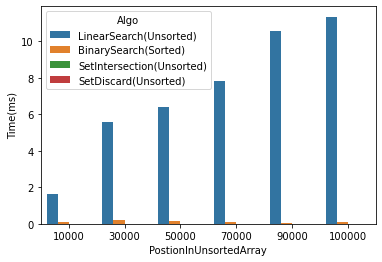

In [13]:
sns.barplot(data = long_df, x='PostionInUnsortedArray', hue='Algo', y='Time(ms)')


## Figure 2: Search Algorithm Time Complexity; log scale

[Text(0, 0.5, 'Time (ms, logscale)')]

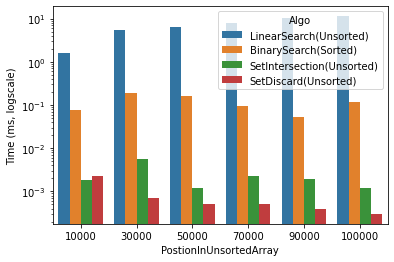

In [14]:
plot = sns.barplot(data = long_df, x='PostionInUnsortedArray', hue='Algo', y='Time(ms)')
plot.set_yscale('log')
plot.set(ylabel='Time (ms, logscale)')

## Figure 3: Search Algorithm Time Complexity; log scale (line plot)

[Text(0, 0.5, 'Time (ms, logscale)')]

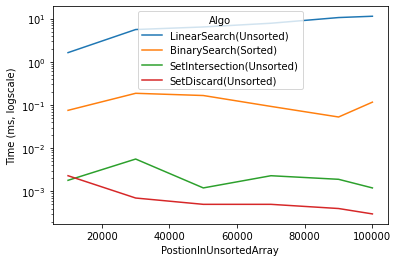

In [15]:
plot_line = sns.lineplot(data = long_df, x='PostionInUnsortedArray', hue='Algo', y='Time(ms)')
plot_line.set_yscale('log')
plot_line.set(ylabel='Time (ms, logscale)')

### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# Discussion

This notebook in demonstrative of the time complexity for string searching. We tested searching an array of 100,000 randomly generated elements for 6 elements at various positions. As The linear search by itself is quite inefficent and grows linearly O(n) with the number of elements searched for a match. This algorithm does not utilize a divide and conquer strategy. Alternatively two methods were tested to contrast this time complexity.

    1) Sorting the list and then performing binary search.
    2) Converting the array to a set. 
    
When given a set, there are two methods for searching for elements, computing the intersection of an element and the set, or using the .discard() method. 

Presented in Table 1 are the times required to perform the various methods (the linear search, the binary search, and the two methods for searching within a set). Additionally, a column is provided that displays the time required to sort the array in ascending order (starting with aa..... and ending in zz.....). The merge sort algorithm was chosen for it's uniform performance, it will always perform in O(nlog(n)) complexity. The combined requirement of the merge sort and binary search takes a disproportionate amount of time in alternative to linearly searching the unsorted array. If however, the 100000 element array does not get added to (requiring an additional sort), this sort is well worth the time requirements. As an alternative approach we can implement the hashed object (a set). A set is always unsorted, it can be added to and does not require sorting. In the best circumstances, where all of the allocated space in our hash table are not occupied, each element will occupy it's own space. As such the lookup is singular and direct. In big O notation this is O(1). Regardless of the size of the array this will perform equivalently (as long as the hash table does not store multiple elements within the same space as a linked list).

Figure 1 displays the searching times in milliseconds required for the methods described above. Figure 2 is also provided for convenience where the y scale is logrithmic such that the order of magnitude in time complexity can be more appropriately visualized. Of the two methods for searching sets the .discard() method outperforms the .intersection() method in terms of time. It should be noted however, that the .discard() method modifies our original set. Because of the rapid accessible nature or hashed objects like a set, these objects serve will as indicies and caches for information where we require the most rapid retrieval methods for records/objects.

# ------------------------ END ------------------------
